# Plot a graphical illustration of definition of RES droughts in our study

Import pandas and matplotlib librairies

In [49]:
import pandas as pd                     # Data 
import matplotlib.pyplot as plt         # Plot
import matplotlib.dates as mdates       # Plot
import datetime as dt

Use Latex Font

In [50]:
plt.rcParams.update({
    "text.usetex": True,                # Use LaTeX for text
    "font.family": "serif",             # Use 'serif' font
    "font.serif": ["Computer Modern"],  # LaTeX default font
    "axes.labelsize": 14,               # Font size for labels
    "font.size": 12,                    # General font size
    "legend.fontsize": 11,              # Font size for legend
    "xtick.labelsize": 10,              # Font size for x-axis
    "ytick.labelsize": 10               # Font size for y-axis
})

Read CSV file containing verification data for wind for EirGrid, Atlite, C3S-E G, C3S-E N

In [51]:
cf_wind = pd.read_csv('../Data/cf_wind_verification.csv',
                      index_col = 0,
                      parse_dates = True
)

Create moving average

We are using the parameter min_periods to do so. This allows create NaN values at the start and end of the dataframe but it makes sure that all values are averaged by the same amount of values.

In [52]:
cf_wind_roll = cf_wind.rolling(window='24H', min_periods=24, center=True).mean()

Set starting and ending dates

In [53]:
start_date = '2021-07-07'
end_date = '2021-07-15'

Select dates for regular and moving average time-series

In [54]:
cf_wind = cf_wind[(start_date <= cf_wind.index) & (cf_wind.index < end_date)] # End date not included
cf_wind_roll = cf_wind_roll[(start_date <= cf_wind_roll.index) & (cf_wind_roll.index < end_date)] # End date not included

Settings for plot

In [86]:
# Format of dates
myFmt = mdates.DateFormatter('%d/%m')

# cm / in ratio
cm =1/2.54

# colors
col = '#2ca02c'; col_roll = '#e377c2'

In [87]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


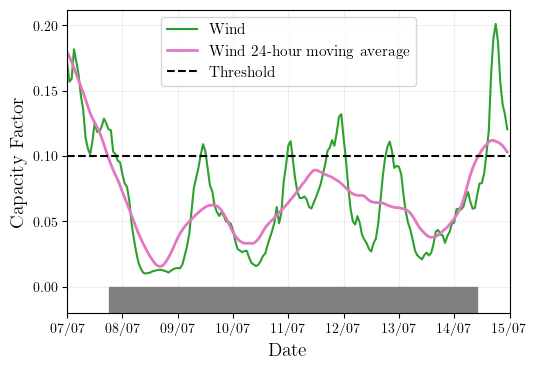

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(14.5*cm, 10*cm))
ax.grid(alpha=0.2, zorder=0)

# Wind data
ax.plot(cf_wind.index, cf_wind['EirGrid'], lw=1.5, color=col, label='Wind', zorder=2)
# Rolling wind data
ax.plot(cf_wind_roll.index, cf_wind_roll['EirGrid'], lw=2, color=col_roll, label='Wind 24-hour moving average', zorder=2)
# Threhsold
ax.axhline(0.1, linestyle='--', lw=1.5, color='black', label='Threshold')
# Wind drought
ax.fill_between(cf_wind_roll.index, 0, -0.02, where=cf_wind_roll['EirGrid'] < 0.1, 
    color='grey', 
    zorder=2
)

# Set axis
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Capacity Factor')
ax.set_ylim(-0.02)
ax.legend(loc='upper center')
ax.set_xlim(dt.datetime.strptime(start_date, '%Y-%m-%d'),
            dt.datetime.strptime(end_date, '%Y-%m-%d')
            )

fig.savefig('../Figures/droughts_methodology.png', dpi=300)